## **Data Analysis**

In [1]:
# Library
#Fund. Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_cln = pd.read_csv('data_hotel_booking_demand_cln.csv')

In [3]:
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83527 entries, 0 to 83526
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83527 non-null  object
 1   market_segment               83527 non-null  object
 2   previous_cancellations       83527 non-null  int64 
 3   booking_changes              83527 non-null  int64 
 4   deposit_type                 83527 non-null  object
 5   days_in_waiting_list         83527 non-null  int64 
 6   customer_type                83527 non-null  object
 7   reserved_room_type           83527 non-null  object
 8   required_car_parking_spaces  83527 non-null  int64 
 9   total_of_special_requests    83527 non-null  int64 
 10  is_canceled                  83527 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [4]:
display(df_cln.describe(), df_cln.describe(include='object'))

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83527.000000,83527.000000,83527.000000,83527.000000,83527.000000,83527.000000
mean,0.086846,0.220671,2.130533,0.062842,0.573455,0.368025
std,0.841240,0.644719,15.350163,0.243910,0.795275,0.482271
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,20.000000,330.000000,3.000000,5.000000,1.000000


,country,market_segment,deposit_type,customer_type,reserved_room_type
count,83527,83527,83527,83527,83527
unique,163,8,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,34058,39460,73339,62699,59997


In [5]:
display(df_cln.head(), df_cln.tail())

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
83522,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83523,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83524,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83525,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
83526,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1


### **Imbalance Data**

In [6]:
df_cln['is_canceled'].value_counts()

is_canceled
0    52787
1    30740
Name: count, dtype: int64

Text(0.5, 1.0, 'Count Plot - is_canceled')

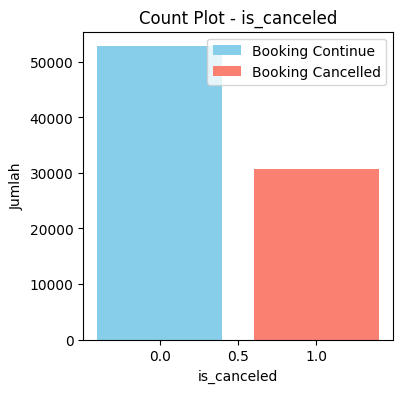

In [7]:
value_counts = df_cln['is_canceled'].value_counts()                     # Mendapatkan data value counts

colors = ['skyblue', 'salmon']                                          # Menentukan warna untuk setiap nilai unik dalam kolom 'is_canceled'

plt.figure(figsize=(4, 4))                                              # Mengatur ukuran figure

bars = plt.bar(value_counts.index, value_counts.values, color=colors)   # Membuat diagram batang dengan warna yang berbeda

plt.legend(bars, ['Booking Continue', 'Booking Cancelled'])             # Menambahkan legenda dengan objek BarContainer yang dihasilkan oleh plt.bar

plt.xlabel('is_canceled')                                               # Menambahkan label sumbu x dan y, serta judul
plt.ylabel('Jumlah')
plt.title('Count Plot - is_canceled')

In [8]:
(pd.crosstab(index=df_cln['is_canceled'],columns='Proportion (%)',normalize=True)*100).round(2)

col_0,Proportion (%)
is_canceled,
0,63.2
1,36.8


Dari presentase di atas kita bisa memastikan bahwa data kita relatif balance karena perbandingan target '1' dengan '0' pada kolom `is_canceled` tidak mencapai 1 : 2

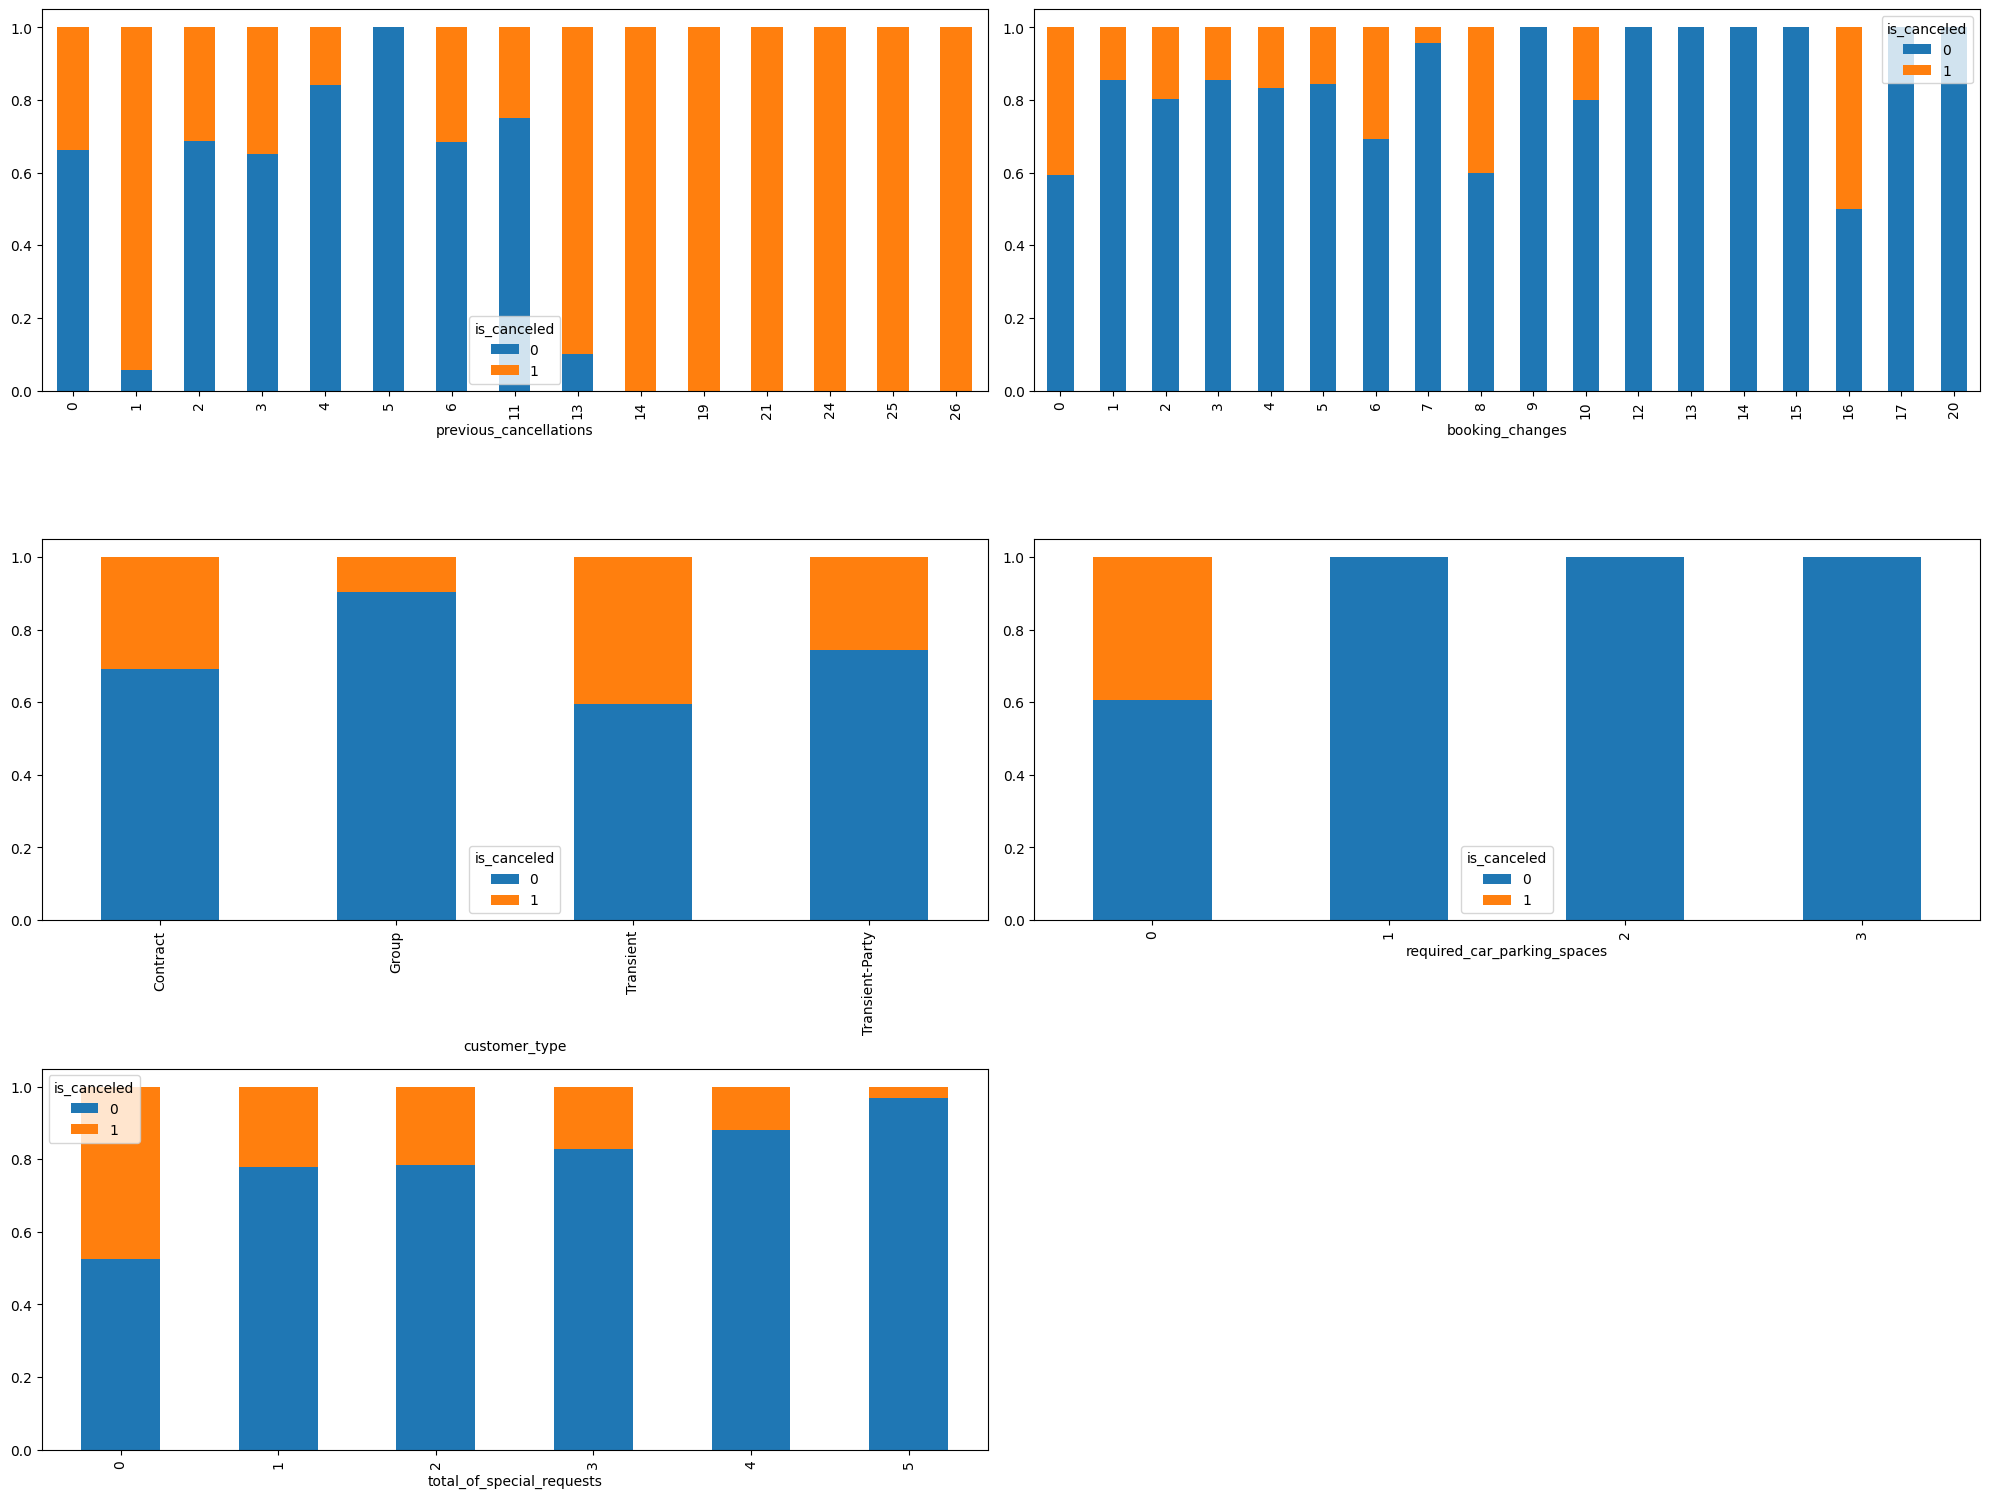

In [9]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df_cln.drop(columns=['country','is_canceled','market_segment','deposit_type','reserved_room_type','days_in_waiting_list']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df_cln[i],df_cln['is_canceled'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

Berdasarkan barplot dan table diatas kita dapat menyimpulkan beberapa hal :
1. Customers yang sering melakukan cancellation booking sebelumnya (`previous_cancellation`) cenderung akan melakukan booking cancellation lagi kedepannya
2. Customers yang tidak melakukan cancellation booking ternyata mayoritas melakukan `booking_changes` sebelumnya. Semantara itu customer yang melakukan cancellation mayoritas yang jarang melakukan `booking_changes`
3. Untuk kolom `customer_type` perilaku pelanggan yang lebih sering melakukan booking cancellation yaitu relatif individu (contract dan transcient) dibandingkan dengan grup (kelompok wisata, acara khusus, dll)
4. Pada table `required_car_parking_spaces`, customer yang request tempat parkir dalam pemesanan kamarnya tidak membatalkan transaksi pemesanan kamar mereka dan tidak ada pelanggan yang membatalkan pemesanan mereka meminta tempat parkir terhadap hotel tersebut.
5. Customer yang memiliki special request (`total_of_special_request`) lebih memilih untuk tidak membatalkan pemesanan kamar dibandingkan yang tidak memiliki special request

### Correlation Matrix

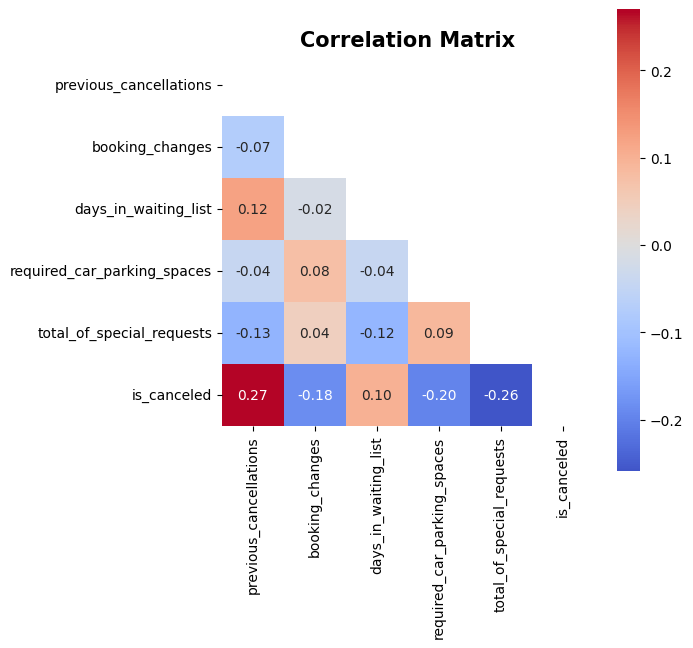

In [10]:
# Correlation matrix
plt.figure(figsize=(6,6))

matrix = np.triu(df_cln.corr(method='spearman', numeric_only=True))

sns.heatmap(data=df_cln.corr(method='spearman', numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', center=0, mask = matrix, square='True')
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()

Berdasarkan correlation matrix, tidak ada fitur yang memiliki korelasi yang kuat terhadap target (`is canceled`). Korelasi paling tinggi dimiliki oleh fitur `required car parking spaces`, di mana korelasinya adalah korelasi negatif. Hal ini menunjukkan bahwa semakin sedikit tempat parkir yang dibutuhkan, semakin besar kemungkinan booking tersebut akan di-cancel.